In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
# Thu thập dữ liệu

- Dữ liệu được lấy tại trang web của WHO, về chủ đề COVID-19 và vaccin liên quan trên toàn thế giới
- Về vấn đề cấp phép thì dữ liệu nảy được WHO cấp phép cho các hoạt động vì lợi ích cộng đồng. Nguyên văn như sau:
    >WHO supports open access to the published output of its activities as a fundamental part of its mission and a public benefit to be encouraged wherever possible. Permission from WHO is not required for the use of the WHO coronavirus disease (COVID-19) dashboard material or data available for download
- WHO có nguồn dữ liệu này được cung cấp bởi các phương tiện truyền thông chính thống trong thời gian từ ngày 31/12/2019 - 21/3/2020. Từ ngày 22/3/2020 dữ liệu được tổng hợp bằng báo cáo hằng ngày của WHO
    >From the 31 December 2019 to the 21 March 2020, WHO collected the numbers of confirmed COVID-19 cases and deaths through official communications under the International Health Regulations (IHR, 2005), ..., Since 22 March 2020, global data are compiled through WHO region-specific dashboards (see links below), and/or aggregate count data reported to WHO headquarters daily. 

    Note: Dữ liệu từ ngày T7, CN được tính vào dữ liệu của ngày T2. Với các quốc gia Trung Đông, dữ liệu ở ngày T6 không được cập nhật.
    
    >Starting 19 June 2021, daily counts of COVID-19 confirmed cases and deaths reported to WHO headquarters on Saturdays and Sundays will be updated on this dashboard on the following Monday. Furthermore, data from the Eastern Mediterranean Region are no long update on Fridays.

Thông tin các file mà bọn em sử dụng, được WHO mô tả như sau:
1. `WHO-COVID-19-global-data.csv` : thống kê số liệu mỗi ngày của các quốc gia.
2. `WHO-COVID-19-global-table-data.csv`: thống kế số liệu thời gian gần đây của các quốc gia.
3. `vaccination-data.csv`: dữ liệu tình hình tiêm chủng tại các quốc gia.
4. `vaccination-metadat.csv`: dữ liệu vaccin trên toàn thế giới.

Dữ liệu được thu thập từ ngày 03/01/2020 đến 02/12/2021 của 237 quốc qua trên thế giới.

---
# Khám phá dữ liệu

Ở bước này nhóm em sẽ khám phá dữ liệu ở 4 tập tin ở trên. ĐƯợc chia thành 4 phần riêng đó là phần tình hình COVID-19 và 
tình hình Vaccin ở các quốc gia. 

**Note**: Trong quá trình khám phá sẽ có những phần tiền xử lí đơn giản.

<hr style="border:1px solid blue"> </hr>

## 1. Khám phá dữ liệu tình hình COVID-19 các quốc gia

### Đọc dữ liệu từ file

- Đọc dữ liệu từ file `WHO-COVID-19-global-table-data.csv` rồi lưu vào dataframe `global_table_df`.
- Để Index là cột `Name`, riêng index `Global` đại diện cho toàn cầu.

In [63]:
global_table_df = pd.read_csv('dataset/WHO-COVID-19-global-table-data.csv',index_col= False)
global_table_df = global_table_df.set_index('Name')
global_table_df.head()

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Name,,,,,,,,,,,
Global,NaN,263563622,3381.387611,3973600,50.979273,653682,5232562,67.131117,47864,0.614071,7804
United States of America,Americas,48413265,14626.247000,605870,183.041000,131187,778336,235.145000,6388,1.930000,1831
India,South-East Asia,34615757,2508.380000,60326,4.371000,9216,470115,34.066000,2647,0.192000,391
Brazil,Americas,22105872,10399.855000,62760,29.526000,11413,614964,289.314000,1625,0.764000,283
The United Kingdom,Europe,10329078,15215.328000,307577,453.079000,53067,145281,214.007000,848,1.249000,141


### Dữ liệu có bao nhiêu dòng, cột

Tính số dòng và số cột của dataframe `global_table_df` rồi lưu vào `num_rows_global_table` và `num_cols_global_table`

In [64]:
num_rows_global_table , num_cols_global_table = global_table_df.shape
print(f'Dữ liệu có {num_rows_global_table} dòng.')
print(f'Dữ liệu có {num_cols_global_table} cột.')

Dữ liệu có 238 dòng.
Dữ liệu có 11 cột.


Chúng ta không xét tới dòng index `Global` nên dữ liệu gồm 237 `quốc gia`, đúng với mô tả ở trên.

### Mỗi dòng có ý nghĩa gì ? Có vấn đề về ý nghĩa giữa các dòng khác nhau hay không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình COVID-19 của từng quốc gia.\
Có vẻ không có vấn đề về ý nghĩa từng dòng.

### Dữ liệu có bị lặp không ?

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [65]:
num_rows_duplicated = num_rows_global_table - len(global_table_df.index.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, em đã mô tả ý nghĩa từng cột dữ liệu trong file `description_global_table.csv`

In [66]:
pd.set_option("display.max_colwidth",200)
description_global_table = pd.read_csv('dataset/Description-global-table.csv',
                                       delimiter= '\t',index_col='Field name')

In [67]:
description_global_table

,Type,Description
Field name,,
Name,String,"Country, territory, area"
WHO_region,String,WHO Region
Cases - cumulative total,Integer,Cumulative confirmed cases reported to WHO to date.
Cases - cumulative total per 100000 population,Decimal,"Cumulative confirmed cases reported to WHO to date per 100,000 population."
Cases - newly reported in last 7 days,Integer,New confirmed cases reported in the last 7 days. Calculated by subtracting previous cumulative case count (8 days prior) from current cumulative cases count.
Cases - newly reported in last 7 days per 100000 population,Decimal,"New confirmed cases reported in the last 7 days per 100,000 population."
Cases - newly reported in last 24 hours,Integer,New confirmed cases reported in the last 24 hours. Calculated by subtracting previous cumulative case count from current cumulative cases count.
Deaths - cumulative total,Integer,Cumulative confirmed deaths reported to WHO to date.
Deaths - cumulative total per 100000 population,Decimal,"Cumulative confirmed deaths reported to WHO to date per 100,000 population."


### Mỗi cột hiện tại đang có dữ liệu gì ? Có cột nào có kiểu dữ liệu không phù hợp không ?

In [68]:
global_table_df.dtypes

WHO Region                                                       object
Cases - cumulative total                                          int64
Cases - cumulative total per 100000 population                  float64
Cases - newly reported in last 7 days                             int64
Cases - newly reported in last 7 days per 100000 population     float64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                         int64
Deaths - cumulative total per 100000 population                 float64
Deaths - newly reported in last 7 days                            int64
Deaths - newly reported in last 7 days per 100000 population    float64
Deaths - newly reported in last 24 hours                          int64
dtype: object

Vậy **Không có gì bất thường**

### Phân bố dữ liệu dạng numerical

Dữ liệu ở đây phần lớn ở dạng `numerical`, trừ `WHO Region`. \
`WHO Region` kiểu dữ liệu `int64` nhưng đây là mã vùng nên không có nhiều ý nghĩa nếu xếp vào `numerical`

In [69]:
def missing_ration(column):
    return (column.isna().mean() * 100).round(1)

def lower_quantile(column):
    return column.quantile(q= 0.25)

def upper_quantile(column):
    return column.quantile(q= 0.75)

---
### Quay lại khám phá dữ liệu

- Ở đây chỉ có cột `WHO Region` không thuộc kiểu `numerical`.
- Dòng `Global` cũng sẽ được không xét vì ta chỉ đánh giá sự tương quan giữa các quốc gia với nhau.

In [70]:
numerical_df = global_table_df.drop(columns = ['WHO Region'],index='Global')
numerical_df.aggregate([missing_ration,pd.Series.min,lower_quantile,
                        pd.Series.median,upper_quantile,pd.Series.max])

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
missing_ration,0.0,0.40000,0.0,0.40000,0.0,0.0,0.4000,0.0,0.4000,0.0
min,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0000,0.0,0.0000,0.0
lower_quantile,10006.0,466.51725,50.0,0.76775,0.0,122.0,7.0330,0.0,0.0000,0.0
median,76496.0,4791.30250,458.0,19.15300,32.0,1327.0,52.6165,4.0,0.0935,0.0
upper_quantile,549810.0,9579.38850,4485.0,136.46925,538.0,8839.0,145.7290,70.0,0.9045,7.0
max,48413265.0,25135.73500,605870.0,1413.31800,131187.0,778336.0,610.2450,8565.0,12.8560,1831.0


Vậy **không có gì bất thường**

### Phân bố dữ liệu dạng categorical

In [71]:
pd.set_option("display.max_colwidth",100)
global_table_df[['WHO Region']].agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,WHO Region
missing_ration,0.4
unique,"[nan, Americas, South-East Asia, Europe, Eastern Mediterranean, Africa, Western Pacific, Other]"
nunique,7


Vậy **không có gì bất thường**

Vẽ `barh chart` để xem phân bố các giá trị của cột `Name`

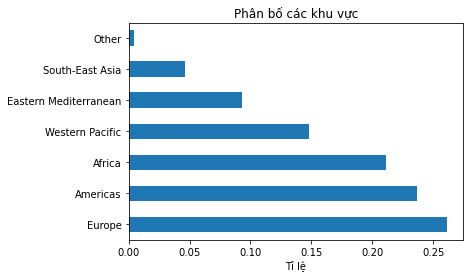

In [72]:
global_table_df['WHO Region'].value_counts(normalize = True).plot.barh()
plt.xlabel('Tỉ lệ')
plt.title('Phân bố các khu vực');

<hr style="border:1px solid blue"> </hr>

## 2. Khám phá dữ liệu tình hình COVID-19 theo ngày

### Đọc dữ liệu từ file

- Đọc dữ liệu từ file `WHO-COVID-19-global-data.csv` rồi lưu vào dataframe `global_df`.
- Mỗi quốc gia được thống kê trong nhiều ngày, ta nên để index là `số dòng`

In [73]:
global_df = pd.read_csv('dataset/WHO-COVID-19-global-data.csv')
global_df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
166132,2021-11-29,ZW,Zimbabwe,AFRO,40,133991,0,4705
166133,2021-11-30,ZW,Zimbabwe,AFRO,235,134226,1,4706
166134,2021-12-01,ZW,Zimbabwe,AFRO,426,134652,1,4707
166135,2021-12-02,ZW,Zimbabwe,AFRO,685,135337,0,4707
166136,2021-12-03,ZW,Zimbabwe,AFRO,1042,136379,0,4707


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_global` và `num_cols_global`

In [74]:
num_rows_global , num_cols_global = global_df.shape
print(f'Dữ liệu có {num_rows_global} dòng')
print(f'Dữ liệu có {num_cols_global} cột')

Dữ liệu có 166137 dòng
Dữ liệu có 8 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình COVID-19 hằng ngày của từng quốc gia. \
Có vẻ không có vấn đề về ý nghĩa từng dòng.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [75]:
num_rows_duplicated = num_rows_global - len(global_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, em đã mô tả ý nghĩa từng cột dữ liệu trong file `description_global.csv`

In [76]:
pd.set_option("display.max_colwidth",500)
description_global = pd.read_csv('dataset/Description-global.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [77]:
description_global

,Type,Description
Field name,,
Date_reported,Date,Date of reporting to WHO
Country_code,String,ISO Alpha-2 country code
Country,String,"Country, territory, area"
WHO_region,String,"WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO)."
New_cases,Integer,New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*
Cumulative_cases,Integer,Cumulative confirmed cases reported to WHO to date.
New_deaths,Integer,New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*
Cumulative_deaths,Integer,Cumulative confirmed deaths reported to WHO to date.


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [78]:
global_df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

`Date_reported` nên có kiểu dữ liệu `datetime`

---
### Tiền xử lý: Thay đổi kiểu dữ liệu

In [79]:
global_df['Date_reported'] = pd.to_datetime(global_df['Date_reported'])

Vậy **Kiểu dữ liệu không có gì bất thường**

---
### Quay lại khám phá dữ liệu: Phân bố kiểu dữ liệu numerical

In [80]:
numerical_df = global_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
missing_ration,0.0,0.0,0.0,0.0,0.0
min,2020-01-03 00:00:00,-32952.0,0.0,-2371.0,0.0
lower_quantile,2020-06-26 00:00:00,0.0,69.0,0.0,0.0
median,2020-12-18 00:00:00,16.0,5906.0,0.0,91.0
upper_quantile,2021-06-11 00:00:00,402.0,102499.0,6.0,1761.0
max,2021-12-03 00:00:00,414188.0,48413265.0,8786.0,778336.0


- new_cases < 0 và new_death < 0 ???
- new_cases = tổng số ca từ hôm trước - tổng số ca tới hôm nay.
- new_death = tổng số ca từ hôm trước - tổng số ca tới hôm nay.

Vây không có gì bất thường

### Phân bố kiểu dữ liệu categorical

In [81]:
pd.set_option("display.max_colwidth",51)
categorical_df = global_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,Country_code,Country,WHO_region
missing_ration,0.4,0.0,0.0
unique,"[AF, AL, DZ, AS, AD, AO, AI, AG, AR, AM, AW, AU...","[Afghanistan, Albania, Algeria, American Samoa,...","[EMRO, EURO, AFRO, WPRO, AMRO, SEARO, Other]"
nunique,236,237,7


Vẽ `barh chart` cho `WHO Region`

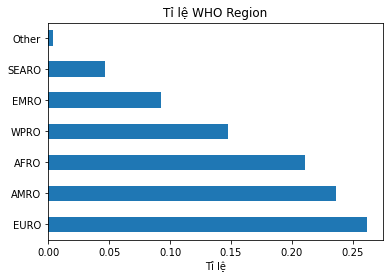

In [82]:
global_df['WHO_region'].value_counts(normalize=True).plot.barh()
plt.xlabel('Tỉ lệ')
plt.title('Tỉ lệ WHO Region');

`Bar chart` này có tỉ lệ khá tương quan với `Bar chart` mà ta đã khám phá ở phần trước đó. 

### Dữ liệu có dòng nào dư thừa hay không?

Các quốc gia khác nhau sẽ có thời điểm xuất hiện ca nhiễm đầu tiên khác nhau, vậy trước thời điểm này thì dữ liệu sẽ toàn `0`(số ca nhiễm, ca tử vong,...) không giúp ích cho việc hiểu dữ liệu. Vậy nên ta chỉ xét dữ liệu từ thời điểm xuất hiện ca nhiễm đầu tiên tới thời điểm cuối cùng thu thập được.
- Thay thế những giá trị bằng 0 thành NaN (dù sai với ý nghĩa nhưng ta sẽ loại bỏ những dòng này nên không sao.)
- Xoá những dòng chứa toàn NaN.

### Tiền xử lý : Giảm số lượng dòng

In [83]:
global_df = global_df.replace(0,np.nan)
global_df = global_df.dropna(how = 'all',subset = ['New_cases','Cumulative_cases',
                                   'New_deaths','Cumulative_deaths'])
global_df = global_df.reset_index().drop(columns='index')

Chúng ta đã giảm được một số lượng lớn những dòng dữ liệu vô nghĩa :))

### Tiền xử lý : Thêm cột Month vào Dataframe

Đôi khi ta sẽ phải thống kê số liệu theo từng tháng để thấy rõ đưa ra nhận xét. Do đó trước khi trả lời câu hỏi, ta sẽ thêm cột `Month` vào DataFrame.

In [84]:
Month = global_df['Date_reported'].dt.month
global_df['Month'] = Month

##
<hr style="border:1px solid blue"> </hr>

## 3. Khám phá dữ liệu tình trạng tiêm chủng COVID-19 ở các quốc gia

### Đọc dữ liệu từ file

Đọc dữ liệu từ file `vaccination-data.csv` rồi lưu vào dataframe `vaccin_df`.

In [85]:
vaccin_df = pd.read_csv('dataset/vaccination-data.csv')
vaccin_df.sample(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
36,Cambodia,KHM,WPRO,REPORTING,2021-11-26,28545707,14125921.0,170.738,84.490,13277803.0,79.418,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...",2021-02-10,5.0
6,Anguilla,AIA,AMRO,REPORTING,2021-12-03,19914,10038.0,132.742,66.911,9213.0,61.412,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comir...",2021-02-05,2.0
147,Niger,NER,AFRO,REPORTING,2021-11-28,971636,507223.0,4.014,2.095,464413.0,1.919,"Beijing CNBG - BBIBP-CorV,SII - Covishield",2021-03-29,2.0
38,Canada,CAN,AMRO,REPORTING,2021-12-03,61432344,30414980.0,162.769,80.586,28958386.0,76.727,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,...",2020-12-14,5.0
189,Slovenia,SVN,EURO,REPORTING,2021-11-28,2516111,1220682.0,120.100,58.243,1010303.0,54.705,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,...",2020-12-23,4.0


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_vaccin` và `num_cols_vaccin`

In [86]:
num_rows_vaccin , num_cols_vaccin = vaccin_df.shape
print(f'Dữ liệu có {num_rows_vaccin} dòng')
print(f'Dữ liệu có {num_cols_vaccin} cột')

Dữ liệu có 228 dòng
Dữ liệu có 14 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình tiêm chủng của từng quốc gia với ngày cập nhật gần nhất.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [87]:
num_rows_duplicated = num_rows_vaccin - len(vaccin_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, ý nghĩa từng cột được mô tả trong file `Description_data.csv`

In [88]:
pd.set_option("display.max_colwidth",500)
description_data = pd.read_csv('dataset/Description_data.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [89]:
description_data

,Type,Description
Field name,,
COUNTRY,String,"Country, territory, area"
ISO3,String,ISO Alpha-3 country code
WHO_REGION,String,"WHO regional offices: WHO Member States are grouped into six WHO regions: Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO)."
DATA_SOURCE,String,"Indicates data source: - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations"
DATE_UPDATED,Date,Date of last update
TOTAL_VACCINATIONS,Integer,Cumulative total vaccine doses administered
PERSONS_VACCINATED_1PLUS_DOSE,Decimal,Cumulative number of persons vaccinated with at least one dose
TOTAL_VACCINATIONS_PER100,Integer,Cumulative total vaccine doses administered per 100 population
PERSONS_VACCINATED_1PLUS_DOSE_PER100,Decimal,Cumulative persons vaccinated with at least one dose per 100 population


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [90]:
vaccin_df.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                        int64
PERSONS_VACCINATED_1PLUS_DOSE           float64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_FULLY_VACCINATED                float64
PERSONS_FULLY_VACCINATED_PER100         float64
VACCINES_USED                            object
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
dtype: object

`DATE_UPDATED`, `FIRST_VACCINE_DATE` nên có kiểu dữ liệu `datetime`

---
### Tiền xử lý: Thay đổi kiểu dữ liệu

In [91]:
vaccin_df = vaccin_df.astype({'DATE_UPDATED': 'datetime64[ns]', 'FIRST_VACCINE_DATE': 'datetime64[ns]'})

In [92]:
assert vaccin_df['DATE_UPDATED'].dtype == np.dtype('datetime64[ns]')
assert vaccin_df['FIRST_VACCINE_DATE'].dtype == np.dtype('datetime64[ns]')

Vậy **Kiểu dữ liệu không có gì bất thường**

---
### Quay lại khám phá dữ liệu: Phân bố kiểu dữ liệu numerical

In [93]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
missing_ration,0.0,0.000000e+00,2.200000e+00,0.00000,2.2000,1.800000e+00,1.80000,8.8,1.3
min,2021-04-09 00:00:00,7.400000e+01,3.700000e+01,0.01300,0.0070,3.700000e+01,0.00700,2020-07-22 00:00:00,1.0
lower_quantile,2021-11-25 00:00:00,2.656605e+05,1.526895e+05,45.36700,26.9515,1.109355e+05,21.23675,2021-01-07 12:00:00,2.0
median,2021-11-28 00:00:00,1.802748e+06,1.070741e+06,98.37900,53.4740,8.130390e+05,44.96050,2021-02-17 00:00:00,4.0
upper_quantile,2021-12-01 00:00:00,1.154469e+07,6.329072e+06,142.65175,71.8095,5.107506e+06,65.75900,2021-03-15 00:00:00,5.0
max,2021-12-04 00:00:00,2.483096e+09,1.240357e+09,296.07000,121.6790,1.089827e+09,118.20100,2021-10-18 00:00:00,10.0


Vậy có 5 cột `PERSONS_VACCINATED_1PLUS_DOSE_PER100 	PERSONS_FULLY_VACCINATED 	PERSONS_FULLY_VACCINATED_PER100 	FIRST_VACCINE_DATE 	NUMBER_VACCINES_TYPES_USED` có giá trị `NaN`

---
### Tiền xử lí: Xử lí các thông tin chứa `NaN`

Kiểm tra những quốc gia nào có `NUMBER_VACCINES_TYPES_USED` là `NaN`

In [96]:
vaccin_df[vaccin_df['NUMBER_VACCINES_TYPES_USED'].isna()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
25,Bonaire,XAA,AMRO,REPORTING,2021-12-03,32084,16995.0,153.402,81.257,15089.0,72.144,NaN,NaT,NaN
172,Saba,XCA,AMRO,REPORTING,2021-12-03,3131,NaN,161.976,NaN,1557.0,80.548,NaN,NaT,NaN
186,Sint Eustatius,XBA,AMRO,REPORTING,2021-12-03,2963,1509.0,94.393,48.073,1454.0,46.320,NaN,NaT,NaN


Như ở trên ta thấy, những quốc gia này các thông tin về các thông tin về loại vaccin đều `NaN`, do đó có thể thông tin sẽ gây sai lệch khi tính toán chung, Nên nhóm em quyết định loại bỏ các dòng này.

In [97]:
vaccin_df = vaccin_df[~vaccin_df['NUMBER_VACCINES_TYPES_USED'].isna()]

Kiểm tra lại phân bổ các biến numerical. Ta thấy các cột `PERSONS_VACCINATED_1PLUS_DOSE`, `PERSONS_VACCINATED_1PLUS_DOSE_PER100`, `PERSONS_FULLY_VACCINATED`, `PERSONS_FULLY_VACCINATED_PER100` có cùng tỉ lệ `missing_ratio`. Vậy các thuộc tính này có thể `NaN` cùng nhau trên một số dòng nào đó. Do đó, em sẽ xem đó là những dòng nào và quyết định xem có nên loại bỏ chúng hay không

In [116]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
missing_ration,0.0,0.000000e+00,1.800000e+00,0.000,1.800,1.800000e+00,1.800,7.6,0.0
min,2021-04-09 00:00:00,7.400000e+01,3.700000e+01,0.013,0.007,3.700000e+01,0.007,2020-07-22 00:00:00,1.0
lower_quantile,2021-11-25 00:00:00,2.729200e+05,1.615210e+05,43.282,26.926,1.268890e+05,20.906,2021-01-07 12:00:00,2.0
median,2021-11-28 00:00:00,1.910830e+06,1.078240e+06,97.858,53.474,8.738020e+05,44.418,2021-02-17 00:00:00,4.0
upper_quantile,2021-12-01 00:00:00,1.199835e+07,6.329967e+06,141.400,71.786,5.340231e+06,65.569,2021-03-15 00:00:00,5.0
max,2021-12-04 00:00:00,2.483096e+09,1.240357e+09,296.070,121.679,1.089827e+09,118.201,2021-10-18 00:00:00,10.0


In [117]:
vaccin_df[vaccin_df['PERSONS_VACCINATED_1PLUS_DOSE'].isna()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
86,Guernsey,GGY,EURO,OWID,2021-11-22,104131,NaN,161.524,NaN,NaN,NaN,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pfi...",NaT,3.0
110,Kuwait,KWT,EMRO,REPORTING,2021-08-14,2668082,NaN,62.476,NaN,NaN,NaN,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...",2020-12-28,5.0
166,Qatar,QAT,EMRO,REPORTING,2021-12-01,4989421,NaN,173.180,NaN,NaN,NaN,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S,...",2020-12-23,4.0
216,United Arab Emirates,ARE,EMRO,REPORTING,2021-11-30,21871201,NaN,221.136,NaN,NaN,NaN,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-Co...",2020-12-14,5.0


Như đã thấy, các dòng này chứa những giá trị NaN cùng nhau. Do đó, em sẽ loại bỏ  chúng. **NOTE**: trong 4 quốc gia này có tới 3 quốc gia thuộc `EMRO`, khồn biết có âm mưu gì không :3

In [118]:
vaccin_df = vaccin_df[~vaccin_df['PERSONS_VACCINATED_1PLUS_DOSE'].isna()]

In [119]:
numerical_df = vaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
missing_ration,0.0,0.000000e+00,0.000000e+00,0.000,0.000,0.000000e+00,0.000,7.2,0.0
min,2021-04-09 00:00:00,7.400000e+01,3.700000e+01,0.013,0.007,3.700000e+01,0.007,2020-07-22 00:00:00,1.0
lower_quantile,2021-11-25 00:00:00,2.729200e+05,1.615210e+05,43.246,26.926,1.268890e+05,20.906,2021-01-11 00:00:00,2.0
median,2021-11-28 00:00:00,1.875132e+06,1.078240e+06,96.403,53.474,8.738020e+05,44.418,2021-02-17 00:00:00,4.0
upper_quantile,2021-12-01 00:00:00,1.199835e+07,6.329967e+06,140.900,71.786,5.340231e+06,65.569,2021-03-15 00:00:00,5.0
max,2021-12-04 00:00:00,2.483096e+09,1.240357e+09,296.070,121.679,1.089827e+09,118.201,2021-10-18 00:00:00,10.0


OK. Mọi thứ trong có vẻ tốt hơn trước rồi. Còn cột `FIRST_VACCINE_DATE` với tỉ lệ `NaN` khá lớn, nhưng em nghĩ nó sẽ không ảnh hưởng đến **phần lớn** các câu hỏi và phân tích.

### Phân bố kiểu dữ liệu categorical

In [129]:
pd.set_option("display.max_colwidth",51)
categorical_df = vaccin_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,VACCINES_USED
missing_ration,0.0,0.0,0.0,0.0,0.0
unique,"[Afghanistan, Albania, Algeria, American Samoa,...","[AFG, ALB, DZA, ASM, AND, AGO, AIA, ATG, ARG, A...","[EMRO, EURO, AFRO, WPRO, AMRO, SEARO, OTHER]","[REPORTING, OWID]","[Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2..."
nunique,221,221,7,2,119


Vẽ `barh chart` cho top 10 `VACCINES_USED`

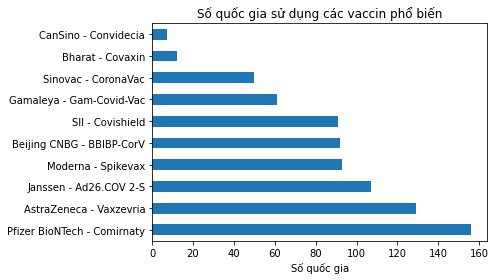

In [95]:
vaccin_df['VACCINES_USED'].str.split(',').explode().value_counts().head(10).plot.barh()
plt.xlabel('Số quốc gia')
plt.title('Số quốc gia sử dụng các vaccin phổ biến');

`Bar chart` này cho thấy Pfizer được sử dụng rộng rãi, bám theo sau là AstraZeneca.

##
<hr style="border:1px solid blue"> </hr>

## 4.Khám phá dữ liệu Vaccin COVID-19

### Đọc dữ liệu từ file

Đọc dữ liệu từ file `vaccination-metadata.csv` rồi lưu vào dataframe `metavaccin_df`.

In [99]:
metavaccin_df = pd.read_csv('dataset/vaccination-metadata.csv')
metavaccin_df.sample(5)

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
75,GAB,Gamaleya - Gam-Covid-Vac,Gam-Covid-Vac,Gamaleya Research Institute,NaN,NaN,NaN,NaN,REPORTING
478,ARG,CanSino - Convidecia,Convidecia,CanSino Biologicals,NaN,2021-09-08,NaN,NaN,REPORTING
807,LTU,Moderna - Spikevax,Spikevax,Moderna,NaN,2021-01-13,NaN,NaN,REPORTING
383,HUN,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,NaN,2020-12-23,NaN,NaN,REPORTING
579,KOR,Novavax - Covavax,Covavax,Novavax,NaN,NaN,NaN,NaN,REPORTING


### Dữ liệu có bao nhiêu dòng và cột ?

Tính số dòng và số cột rồi lưu vào biến `num_rows_metavaccin` và `num_cols_metavaccin`

In [100]:
num_rows_metavaccin , num_cols_metavaccin = metavaccin_df.shape
print(f'Dữ liệu có {num_rows_metavaccin} dòng')
print(f'Dữ liệu có {num_cols_metavaccin} cột')

Dữ liệu có 853 dòng
Dữ liệu có 9 cột


### Mỗi dòng dữ liệu có ý nghĩa gì ? Có vấn đề các dòng có ý nghĩa khác nhau không ?

Theo quan sát sơ bộ và file mô tả dữ liệu trên website chính của WHO thì dữ liệu cho biết thông tin về tính hình sử dụng vaccin ở các quốc gia với ngày được cập nhật gần nhất.

### Dữ liệu có bị lặp không

Tính số dòng dữ liệu bị trùng (nếu có) rồi lưu vào biến `num_rows_dupicated`.

In [101]:
num_rows_duplicated = num_rows_metavaccin - len(metavaccin_df.drop_duplicates())
print(num_rows_duplicated)

0


### Mỗi cột có ý nghĩa gì ?

Dựa vào mô tả chính thức trên website WHO, ý nghĩa từng cột được mô tả trong file `Description_data.csv`

In [102]:
pd.set_option("display.max_colwidth",500)
description_data = pd.read_csv('dataset/Description_metadata.csv',
                                 delimiter= '\t',index_col= 'Field name')

In [103]:
description_data

,Type,Description
Field name,,
ISO3,String,ISO Alpha-3 country code
VACCINE_NAME,String,Combined short name of vaccine: âCompany - Product nameâ (see below)
PRODUCT_NAME,String,"Name or label of vaccine product, or type of vaccine (if unnamed)."
COMPANY_NAME,String,Marketing authorization holder of vaccine product.
AUTHORIZATION_DATE,Date,"Date vaccine product was authorised for use in the country, territory, area."
START_DATE,Date,Start/launch date of vaccination with vaccine type (excludes vaccinations during clinical trials).
END_DATE,Date,End date of vaccine rollout
COMMENT,String,Comments related to vaccine rollout
DATA_SOURCE,String,"Indicates data source - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations"


### Mỗi cột hiện tại đang có dữ liệu gì ?

In [104]:
metavaccin_df.dtypes

ISO3                   object
VACCINE_NAME           object
PRODUCT_NAME           object
COMPANY_NAME           object
AUTHORIZATION_DATE     object
START_DATE             object
END_DATE              float64
COMMENT               float64
DATA_SOURCE            object
dtype: object

`AUTHORIZATION_DATE`, `START_DATE`, `END_DATE`  nên có kiểu dữ liệu `datetime`\
`COMMENT` nên có dữ liệu là `object`

---
### Tiền xử lý: Thay đổi kiểu dữ liệu

In [105]:
metavaccin_df = metavaccin_df.astype({'AUTHORIZATION_DATE': 'datetime64[ns]', 'START_DATE': 'datetime64[ns]',\
                                      'END_DATE': 'datetime64[ns]', 'COMMENT': 'str'})

In [106]:
assert metavaccin_df['AUTHORIZATION_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['START_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['END_DATE'].dtype == np.dtype('datetime64[ns]')
assert metavaccin_df['COMMENT'].dtype == np.dtype('object')

Vậy **Kiểu dữ liệu không có gì bất thường**

---
### Quay lại khám phá dữ liệu: Phân bố kiểu dữ liệu numerical

In [107]:
numerical_df = metavaccin_df.select_dtypes(['int64','float64','datetime64'])
numerical_df.agg([missing_ration,pd.Series.min,lower_quantile,
                  pd.Series.median,upper_quantile,pd.Series.max])

/home/lav/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,AUTHORIZATION_DATE,START_DATE,END_DATE
missing_ration,59.3,33.9,100.0
min,2020-07-22 00:00:00,2020-07-22 00:00:00,NaT
lower_quantile,2021-01-29 12:00:00,2021-02-03 00:00:00,NaT
median,2021-02-24 00:00:00,2021-03-10 00:00:00,NaT
upper_quantile,2021-05-06 00:00:00,2021-04-28 00:00:00,NaT
max,2021-12-31 00:00:00,2021-11-14 00:00:00,NaT


Vậy `END_DATE` chứa toàn rỗng. Nên ta sẽ loại bỏ

---
### Tiền xử lí: Loại bỏ cột NaN

In [108]:
metavaccin_df = metavaccin_df.drop(columns=['END_DATE'])

In [109]:
assert 'END_DATE' not in metavaccin_df.columns

---
### Quay lại khám phá: Phân bố kiểu dữ liệu categorical

In [110]:
pd.set_option("display.max_colwidth",51)
categorical_df = metavaccin_df.select_dtypes(['object'])
categorical_df.agg([missing_ration,pd.Series.unique,pd.Series.nunique])

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,COMMENT,DATA_SOURCE
missing_ration,0.0,0.0,0.0,0.5,0.0,0.0
unique,"[JEY, GGY, SHN, RUS, IMN, GIB, GRL, FRO, TUR, F...","[Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...","[mRNA-1273, AZD1222, Comirnaty, EpiVacCorona, C...","[Moderna, AstraZeneca, Pfizer BioNTech, State R...",[nan],"[OWID, REPORTING]"
nunique,225,25,24,19,1,2


Vẽ `barh chart` cho top 10 `COMPANY_NAME`

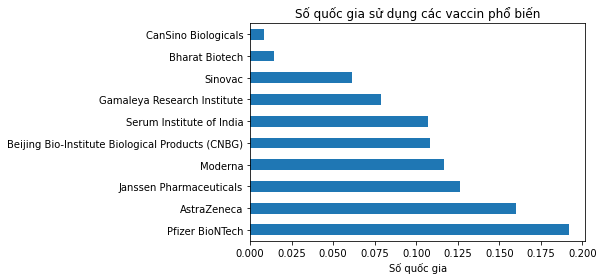

In [111]:
metavaccin_df['COMPANY_NAME'].value_counts(normalize=True).head(10).plot.barh()
plt.xlabel('Số quốc gia')
plt.title('Số quốc gia sử dụng các vaccin phổ biến');

`Bar chart` này cho thấy sự hợp lí khi Pfizer BioNTech và AstraZeneca tiếp tục đứng đầu.